# DLNLP Project - IMDB Reviews Dataset

## Group 14
Anisha Siwas 025007

Sarthak Jain 025029

Tanya Goel 025034

Chirayu Jain 025049

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [2]:
imdb_reviews = pd.read_csv("C:/Users/chira/Desktop/IMDB Sample.csv")

LOWERCASING

In [3]:
def convert_lowercase (column):
    column = column.str.lower()
    return column

In [4]:
print(f"Before applying lower casing: {imdb_reviews['review'][0][:10]}")

imdb_reviews['review'] = convert_lowercase(imdb_reviews['review'])

print(f"After applying lower casing : {imdb_reviews['review'][0][:10]}")

Before applying lower casing: A wonderfu
After applying lower casing : a wonderfu


REMOVING HTML TAGS

In [5]:
def remove_html_tags(text):
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)

In [6]:
text = '<h1> This is a h1 tag </h1>'
print(remove_html_tags(text))

 This is a h1 tag 


In [7]:
print(f"Before removing HTML tags: {imdb_reviews['review'][1][:70]}")
imdb_reviews['review'] = imdb_reviews['review'].apply(remove_html_tags)
print(f"After removing HTML tags : {imdb_reviews['review'][1][:70]}")

Before removing HTML tags: i thought this was a wonderful way to spend time on a too hot summer w
After removing HTML tags : i thought this was a wonderful way to spend time on a too hot summer w


REMOVING PUNCTUATIONS

In [8]:
import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [9]:
text = 'Hello!'
print(f'Text before punctuation: {text}')
text_wihout_punc = remove_punc(text)
print(f'Text after punctuation : {text_wihout_punc}')

Text before punctuation: Hello!
Text after punctuation : Hello


In [10]:
print(f"Review before removing punctuation: {imdb_reviews['review'][0]}")
imdb_reviews['review'] = imdb_reviews['review'].apply(remove_punc)
print(f"Review after removing punctuation : {imdb_reviews['review'][0]}")

Review before removing punctuation: a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.
R

CHAT WORD TREATMENT

In [11]:
# Some chat words examples
chat_words = {
    'FYI' : 'for your information',
    'LOL' : 'laugh out loud',
    'AFK' : 'away from keyboard'
}

def chat_words_conv(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)

    return ' '.join(new_text)

In [12]:
text = 'FyI I was afk for a while'
print(chat_words_conv(text))

for your information I was away from keyboard for a while


SPELLING CORRECTION

In [13]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob
text = 'stringg witth lotts of spelingg erors'
textblob_ = TextBlob(text)
print(f'Correct text: {textblob_.correct().string}')

Correct text: string with lots of spelling errors


REMOVING STOP WORDS

In [15]:
stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords_english:
            continue
        else:
            new_text.append(word)

    return ' '.join(new_text)

In [16]:
text = 'Stop words are a set of commonly used words in a language'
print(f'Text before removing stop words: {text}')
print(f'Text after removing stop words : {remove_stopwords(text)}')

Text before removing stop words: Stop words are a set of commonly used words in a language
Text after removing stop words : Stop words set commonly used words language


HANDLING EMOJIS

In [17]:
pip install emoji 

Note: you may need to restart the kernel to use updated packages.


In [18]:
import emoji
text = 'He is suffering from very high fever 🤒'
print(emoji.demojize(text))

He is suffering from very high fever :face_with_thermometer:


TOKENIZATION

In [19]:
sent_1 = 'Life is either a great adventure or nothing!'
print(word_tokenize(sent_1))

['Life', 'is', 'either', 'a', 'great', 'adventure', 'or', 'nothing', '!']


In [20]:
pip install SpaCy

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
sent_2 = 'The distance between my house and new flower shop in only 5km!'
doc = nlp(sent_2)
for token in doc:
    print(token, end= ', ')

The, distance, between, my, house, and, new, flower, shop, in, only, 5, km, !, 

STEMMING

In [23]:
ps = PorterStemmer()
def perform_stemming(text):
    new_text = [ps.stem(word) for word in text.split()]
    return ' '.join(new_text)

In [24]:
text = 'walk walks walked walking'
perform_stemming(text)

'walk walk walk walk'

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
imdb_reviews

,review,sentiment
0,a wonderful little production the filming tech...,positive
1,i thought this was a wonderful way to spend ti...,positive
2,basically theres a family where a little boy j...,negative
3,petter matteis love in the time of money is a ...,positive
4,probably my alltime favorite movie a story of ...,positive
...,...,...
9993,first off this is the worst movie ive ever see...,negative
9994,fun entertaining movie about wwii german spy j...,positive
9995,give me a break how can anyone say that this i...,negative
9996,this movie is a bad movie but after watching a...,negative


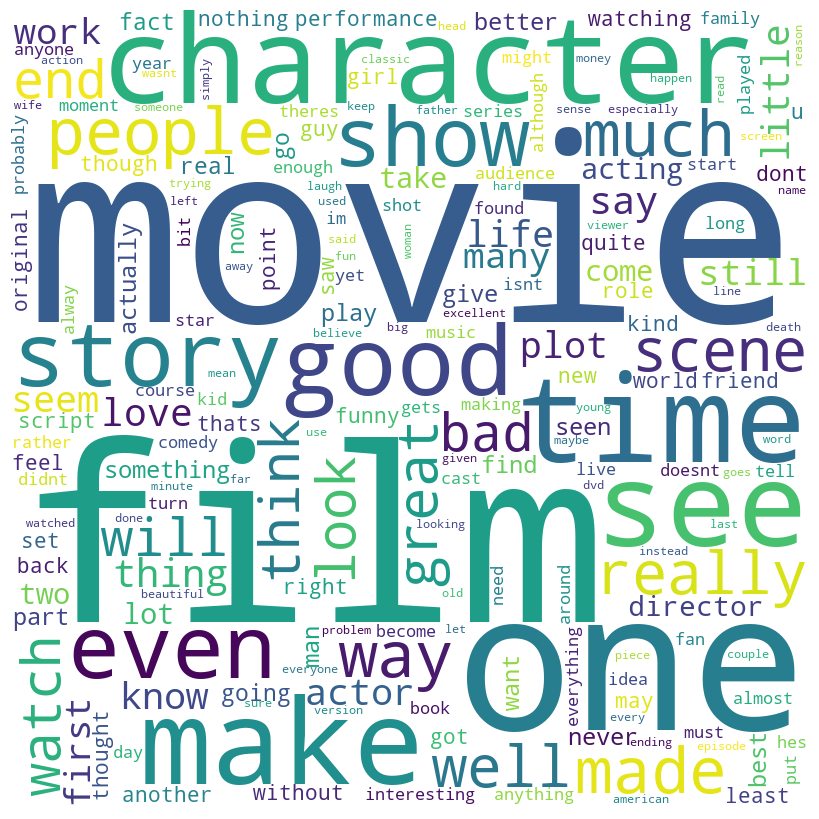

In [27]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in imdb_reviews.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
imdb_reviews = imdb_reviews[imdb_reviews['review'].map(lambda x: x.isascii())] #Removing all non-english reviews

In [29]:
imdb_reviews = imdb_reviews.dropna(how='all') # dropping blank rows

In [30]:
imdb_reviews

,review,sentiment
0,a wonderful little production the filming tech...,positive
1,i thought this was a wonderful way to spend ti...,positive
2,basically theres a family where a little boy j...,negative
3,petter matteis love in the time of money is a ...,positive
4,probably my alltime favorite movie a story of ...,positive
...,...,...
9993,first off this is the worst movie ive ever see...,negative
9994,fun entertaining movie about wwii german spy j...,positive
9995,give me a break how can anyone say that this i...,negative
9996,this movie is a bad movie but after watching a...,negative


In [31]:
xx = imdb_reviews['review'].to_string(header=False, index=False)

In [32]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  xx

sample = remove_url(sample)
#print(f"Text after removing url:- \n {sample}")

In [33]:
!pip install demoji
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


#print(f"Before Handling emoji:- \n {sample}")
#print(f"After Handling emoji:- \n {handle_emoji(sample)}")

In [34]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = sample
#print(sample)
#print(word_tokenizer(sample))

In [35]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    
    return text


#print(f"Before removing stopwords : {word_tokenizer(sample)}")
#print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

In [36]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    #text = remove_stopwords(text)
    text = " ".join(text)

    return text


In [37]:
!pip install spacy

In [38]:
import spacy
sp = spacy.load("en_core_web_sm")

In [39]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [40]:
from nltk.corpus import stopwords

In [41]:
from tqdm import tqdm

tqdm.pandas()

imdb_reviews['clean_review'] = imdb_reviews['review'].progress_map(preprocessing)

100%|█████████████████████████████████████████████████████████████████████████████| 9059/9059 [00:42<00:00, 215.42it/s]


In [42]:
xx = imdb_reviews['clean_review'].to_string(header=False, index=False)

In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
example_sent = xx
  
stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(example_sent)
  
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print(word_tokens)
print(filtered_sentence)

['a', 'wonderful', 'little', 'production', 'the', 'filming', 'techn', '...', 'i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'tim', '...', 'basically', 'theres', 'a', 'family', 'where', 'a', 'little', 'boy', 'ja', '...', 'petter', 'matteis', 'love', 'in', 'the', 'time', 'of', 'money', 'is', 'a', 'v', '...', 'probably', 'my', 'alltime', 'favorite', 'movie', 'a', 'story', 'of', 's', '...', 'i', 'sure', 'would', 'like', 'to', 'see', 'a', 'resurrection', 'of', 'a', 'up', '...', 'this', 'show', 'was', 'an', 'amazing', 'fresh', 'innovative', 'idea', '...', 'encouraged', 'by', 'the', 'positive', 'comments', 'about', 'this', '...', 'if', 'you', 'like', 'original', 'gut', 'wrenching', 'laughter', 'you', '...', 'phil', 'the', 'alien', 'is', 'one', 'of', 'those', 'quirky', 'films', 'whe', '...', 'i', 'saw', 'this', 'movie', 'when', 'i', 'was', 'about', '12', 'when', 'it', 'ca', '...', 'so', 'im', 'not', 'a', 'big', 'fan', 'of', 'bolls', 'work', 'but', 'then', 'agai', '...',

In [44]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = imdb_reviews['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['wonderful', 'little', 'production', 'the', 'filming', 'technique', 'is', 'very', 'unassuming', 'very', 'oldtimebbc', 'fashion', 'and', 'gives', 'comforting', 'and', 'sometimes', 'discomforting', 'sense', 'of', 'realism', 'to', 'the', 'entire', 'piece', 'the', 'actors', 'are', 'extremely', 'well']


In [45]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [46]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
!pip install spacy
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ'])
print(data_lemmatized[:1])

[['wonderful', 'little', 'production', 'filming', 'technique', 'oldtimebbc', 'fashion', 'sense', 'realism', 'entire', 'piece', 'actor', 'sheen', 'polari', 'voice', 'seamless', 'reference', 'entry', 'worth', 'piece', 'masterful', 'production', 'great', 'master', 'comedy', 'life', 'realism', 'little', 'thing', 'fantasy', 'guard', 'traditional', 'dream', 'technique', 'solid', 'disappear', 'knowledge', 'scene', 'flat', 'halliwell', 'mural', 'surface']]


In [48]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [49]:
from nltk import corpus

In [50]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(2, 1), (11, 1), (13, 1), (17, 1), (18, 1), (19, 1), (20, 1), (23, 1), (24, 1), (26, 1), (29, 1), (30, 1), (31, 2), (32, 1), (36, 1), (42, 2), (44, 1), (45, 2), (47, 2), (52, 1), (54, 1), (57, 1), (58, 1), (60, 1), (61, 2), (66, 1), (74, 1), (75, 1), (279, 1), (556, 1), (872, 1), (1628, 1), (2337, 1), (3149, 1), (5700, 1), (6422, 1)]]


In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [52]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43845038028704425


In [53]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"real" + 0.051*"family" + 0.034*"boy" + 0.023*"war" + 0.022*"son" + '
  '0.021*"shot" + 0.020*"drama" + 0.019*"style" + 0.019*"dialog" + '
  '0.018*"parent"'),
 (1,
  '0.047*"amazing" + 0.044*"brilliant" + 0.024*"fit" + 0.023*"respect" + '
  '0.020*"lovely" + 0.017*"hot" + 0.012*"animal" + 0.010*"intriguing" + '
  '0.009*"alien" + 0.005*"favourite"'),
 (2,
  '0.112*"film" + 0.033*"great" + 0.026*"scene" + 0.019*"actor" + '
  '0.016*"little" + 0.016*"life" + 0.014*"performance" + 0.014*"good" + '
  '0.013*"much" + 0.011*"comedy"'),
 (3,
  '0.003*"gut" + 0.000*"blew" + 0.000*"mona" + 0.000*"moustache" + '
  '0.000*"enrolling" + 0.000*"laughaplenty" + 0.000*"frat" + 0.000*"raise" + '
  '0.000*"pleasence" + 0.000*"backing"'),
 (4,
  '0.101*"movie" + 0.031*"good" + 0.029*"bad" + 0.025*"story" + 0.025*"time" + '
  '0.018*"thing" + 0.013*"many" + 0.011*"year" + 0.010*"way" + 0.009*"love"'),
 (5,
  '0.000*"brite" + 0.000*"latersee" + 0.000*"jerk" + 0.000*"mustwatch" + '
  '0.000*